In [14]:
import numpy as np
import pandas as pd
import os
from random import randint

In [4]:
al_countyfile = '../NOAA_testpulls/US_AL_cseat13t19.csv'
county_df = pd.read_csv(al_countyfile)
county_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SN32,SNOW,SX32,TAVG,TMAX,TMIN
0,USC00012209,"DECATUR 4 SE, AL US",34.57556,-86.93389,167.6,2013-01-01,NaN,1.73,NaN,NaN,NaN,NaN,51.0,33.0
1,USC00012209,"DECATUR 4 SE, AL US",34.57556,-86.93389,167.6,2013-01-02,NaN,0.00,NaN,NaN,NaN,NaN,51.0,33.0
2,USC00012209,"DECATUR 4 SE, AL US",34.57556,-86.93389,167.6,2013-01-03,NaN,0.00,NaN,NaN,NaN,NaN,51.0,31.0
3,USC00012209,"DECATUR 4 SE, AL US",34.57556,-86.93389,167.6,2013-01-04,NaN,0.00,NaN,NaN,NaN,NaN,45.0,28.0
4,USC00012209,"DECATUR 4 SE, AL US",34.57556,-86.93389,167.6,2013-01-05,NaN,0.00,NaN,NaN,NaN,NaN,45.0,28.0


In [7]:
countynames = list(county_df['NAME'].unique())
countynames

['DECATUR 4 SE, AL US',
 'TROY MUNICIPAL AIRPORT, AL US',
 'MOBILE DOWNTOWN AIRPORT, AL US',
 'LAFAYETTE 2 W, AL US',
 'BAY MINETTE, AL US',
 'HEFLIN, AL US',
 'JASPER, AL US',
 'DADEVILLE 2, AL US',
 'FAYETTE, AL US',
 'ROCKFORD 3 ESE, AL US',
 'MARION JUNCTION 2 NE, AL US',
 'ATHENS, AL US',
 'BREWTON 3 ENE, AL US',
 'OPELIKA, AL US',
 'MOULTON 2, AL US',
 'PHENIX CITY 2.2 NNW, AL US',
 'EVERGREEN MIDDLETON FIELD, AL US',
 'FLORENCE 0.6 NE, AL US',
 'HAMILTON 3 S, AL US',
 'ENTERPRISE 2 W, AL US',
 'RUSSELLVILLE NUMBER 2, AL US',
 'CAMDEN 1.0 NNE, AL US',
 'ONEONTA, AL US',
 'FORT PAYNE, AL US',
 'GENEVA NUMBER 2, AL US',
 'SELMA, AL US',
 'DOUBLE SPRINGS 3.2 NNE, AL US',
 'GREENVILLE MAC CRENSHAW MEMORIAL AIRPORT, AL US',
 'GUNTERSVILLE 2.2 SW, AL US',
 'TALLADEGA ALABAMA, AL US',
 'MONTGOMERY AIRPORT, AL US',
 'FORT PAYNE 1.4 WSW, AL US',
 'HUNTSVILLE INTNL AIRPORT, AL US',
 'JACKSONVILLE, AL US',
 'GREENSBORO, AL US',
 'CLANTON, AL US',
 'GADSDEN, AL US',
 'TUSCALOOSA AIRPORT ASOS

In [34]:
machine_df = pd.DataFrame(countynames, columns=['county'])
machine_df.head()

,county
0,"DECATUR 4 SE, AL US"
1,"TROY MUNICIPAL AIRPORT, AL US"
2,"MOBILE DOWNTOWN AIRPORT, AL US"
3,"LAFAYETTE 2 W, AL US"
4,"BAY MINETTE, AL US"


In [35]:
len(machine_df)

52

In [57]:
machine_df['avgmaxF'] = np.random.randint(70,100,52)
machine_df['avgminF'] = np.random.randint(0,40,52)
machine_df['avgprecip'] = np.random.randint(0,30,52)
machine_df['avgsnow'] = np.random.randint(0,10,52)
machine_df['success'] = np.random.randint(0,2,52)

In [58]:
machine_df.head()

,county,avgmaxF,avgminF,avgprecip,avgsnow,success
0,"DECATUR 4 SE, AL US",95,28,2,5,1
1,"TROY MUNICIPAL AIRPORT, AL US",81,4,28,7,1
2,"MOBILE DOWNTOWN AIRPORT, AL US",74,7,17,7,0
3,"LAFAYETTE 2 W, AL US",74,5,6,4,0
4,"BAY MINETTE, AL US",84,15,29,5,0


In [59]:
y = machine_df['success']
X = machine_df.drop(columns=['county','success'])

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [61]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [63]:
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.05382034525449819


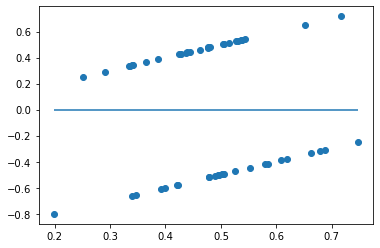

In [64]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6153846153846154


In [71]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

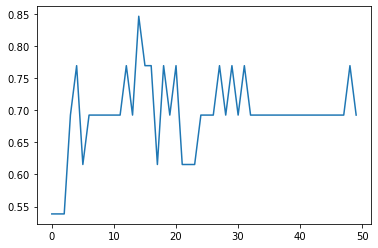

score: 0.6923076923076923


In [73]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')